Take the CIFAR10 dataset and build an MLP for 10-class classification.


In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [31]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


In [32]:
x_train.shape

(50000, 32, 32, 3)

In [33]:
x_test.shape

(10000, 32, 32, 3)

The data is in the form of pixels. Every image is a numpy array, but these pixel values can be converted to the corresponding images as well

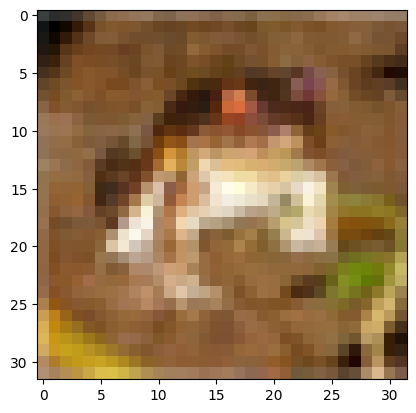

In [34]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

scaling every pixel value in the range [0, 1] so that the NN weights converge faster

In [35]:
x_train = x_train / 255
x_test = x_test / 255

We use softmax (generalised form of sigmoid) for multiclass classification. Here there are 10 classes.

In [36]:
model = Sequential()

model.add(Flatten(input_shape=(32, 32,3)))#input layer
model.add(Dense(64, activation='relu'))#hidden layer
model.add(Dense(64, activation='relu'))#hidden layer
model.add(Dense(10, activation='softmax'))#output layer

in the first layer (flatten) we convert the matrix into a 1d array (arranged row-wise) because we are dealing with an MLP which cannot handle 3d array. So in this layer there is no training happening, that is why there are no parameters in the flatten layer.

In [37]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_9 (Dense)             (None, 64)                196672    
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 201482 (787.04 KB)
Trainable params: 201482 (787.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Sparse categorical crossentropy** is a loss used in classification tasks where the goal is to assign an input into one of multiple categories. The "sparse" part means that it expects the labels to be provided as integers, representing the correct class for each input.

The "categorical crossentropy" part refers to the mathematical formula used to measure the difference between the predicted probabilities and the actual class.

In simpler terms, it helps the model learn by penalizing it more when its prediction diverges from the correct category, making it suitable for scenarios where each input belongs to only one class among several.

In [38]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='SGD',
              metrics=['accuracy'])

In [39]:
fit=model.fit(x_train, y_train, validation_split=0.2, epochs=50)

Epoch 1/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.9355 - accuracy: 0.3024 - val_loss: 1.8321 - val_accuracy: 0.3465
Epoch 2/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.7662 - accuracy: 0.3710 - val_loss: 1.7845 - val_accuracy: 0.3676
Epoch 3/50
1250/1250 [==============================] - 7s 6ms/step - loss: 1.6898 - accuracy: 0.4013 - val_loss: 1.6846 - val_accuracy: 0.4006
Epoch 4/50
1250/1250 [==============================] - 7s 6ms/step - loss: 1.6372 - accuracy: 0.4204 - val_loss: 1.7066 - val_accuracy: 0.3952
Epoch 5/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.5969 - accuracy: 0.4295 - val_loss: 1.6201 - val_accuracy: 0.4258
Epoch 6/50
1250/1250 [==============================] - 7s 6ms/step - loss: 1.5665 - accuracy: 0.4424 - val_loss: 1.6260 - val_accuracy: 0.4221
Epoch 7/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.5408 - accuracy: 0.4528 - val_loss: 1.5624 - val_accuracy:

In [40]:
y_prob = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [41]:
y_prob[0]


array([0.01984457, 0.15502642, 0.13030675, 0.18478176, 0.12109486,
       0.13690633, 0.10626609, 0.0003597 , 0.12687254, 0.01854097],
      dtype=float32)

In [42]:
import numpy as np
np.argmax(y_prob[0])

3

In [43]:
y_hat = y_prob.argmax(axis=1)

In [14]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy_score(y_test, y_hat)

0.487

In [45]:
y_hat

array([3, 8, 8, ..., 5, 2, 7])

In [46]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

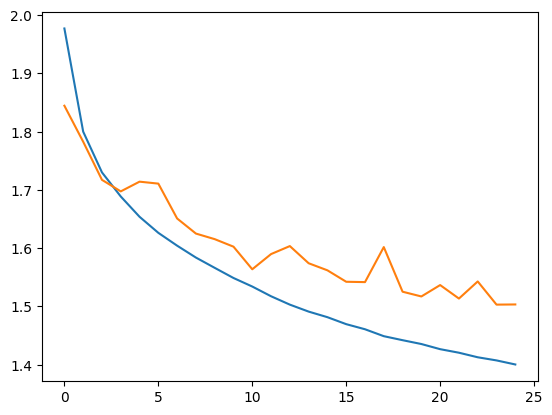

In [ ]:
plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])

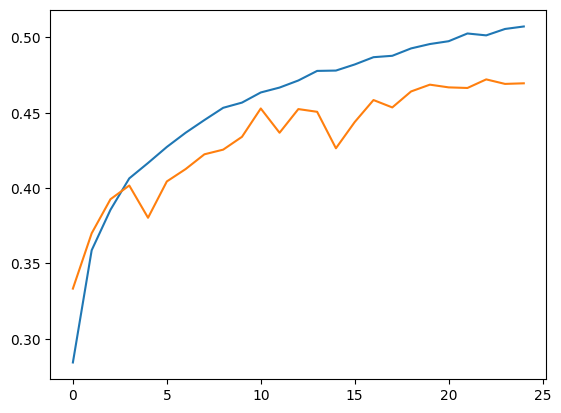

In [ ]:
plt.plot(fit.history['accuracy'])
plt.plot(fit.history['val_accuracy'])

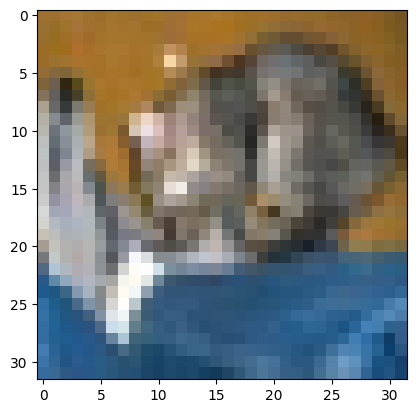

In [47]:
plt.imshow(x_test[0])